In [1]:
#importar librerias que vamos a utilizar
import numpy as np
import pandas as pd
from sklearn import preprocessing,cross_validation,neighbors
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from matplotlib import pyplot,style
import warnings
from math import sqrt
from collections import Counter

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("../reporte_3/iris.csv")

In [3]:
#v1=sepal.length,v2=sepal.width,v3=petal.length,v4=petal.width,clase
df.columns = [["v1","v2","v3","v4","clase"]]

In [4]:
df.head()

,v1,v2,v3,v4,clase
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
#separando las caracteristicas de las clases, X=caracteristicas y=clases
X = df[["v1","v2","v3","v4"]]
y = df[["clase"]]

In [6]:
#usando sklearn para aplicar PCA
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95)+1

In [7]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [8]:
X_reduced = pd.DataFrame(X_reduced)

In [9]:
X_reduced.columns = [["v1","v2"]]

In [10]:
X_reduced.head()

,v1,v2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [11]:
#validación cruzada, dividir conjunto de prueba y entrenamiento
#ajustando a 20% de prueba y 80% de entrenamiento
X_train,X_test,Y_train,Y_test = cross_validation.train_test_split(X_reduced,y,test_size=0.2)

In [12]:
#clasificador knn de sklearn
#parametro p=2, para usar como métrica la distancia euclidea
#n_neighbors por defecto es igual a 5, indica el número de vecinos
knn = neighbors.KNeighborsClassifier(n_neighbors=2,p=2)

In [13]:
#ajustando el clasificador con los datos de entrenamiento
knn.fit(X_train,Y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [14]:
#una vez que se ha ajustado el modelo, comprobamos la precisión con los datos de prueba
accuracy = knn.score(X_test,Y_test)
accuracy

0.9

Text(0,0.5,'Varianza explicada')

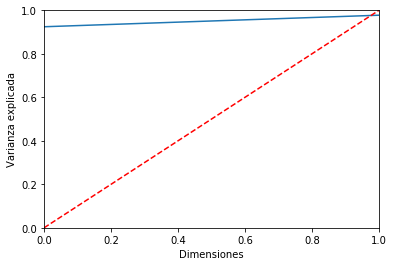

In [16]:
pyplot.plot(cumsum)
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.xlabel("Dimensiones")
pyplot.ylabel("Varianza explicada")

In [50]:
from sklearn.preprocessing import StandardScaler

In [52]:
x_std = StandardScaler().fit_transform(X)

In [54]:
#matriz de covarianza
features = x_std.T
cov_matriz = np.cov(features)
print(cov_matriz)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [56]:
#eigen vectores y eigen valores de la matriz de covarianza
eig_vals,eig_vecs = np.linalg.eig(cov_matriz)

In [58]:
print("\nEigen vectores \n%s" %eig_vecs)


Eigen vectores 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [57]:
print("\nEigen valores \n%s" %eig_vals)


Eigen valores 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [83]:
#¿cuanta información se le puede atribuir a cada una de las características?
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals,reverse=True)]
var_exp

[72.96244541329987, 22.850761786701764, 3.6689218892828714, 0.5178709107154879]

In [84]:
#v1=sepal.length,v2=sepal.width,v3=petal.length,v4=petal.width,clase
var_exp = {
    "sepal.length":var_exp[0],
    "sepal.width":var_exp[1],
    "petal.length":var_exp[2],
    "petal.width":var_exp[3]
}
var_exp

{'sepal.length': 72.96244541329987,
 'sepal.width': 22.850761786701764,
 'petal.length': 3.6689218892828714,
 'petal.width': 0.5178709107154879}

In [109]:
predict = pd.DataFrame(knn.predict(X_test))
predict.columns = [["clase"]]
predict

,clase
0,Setosa
1,Setosa
2,Virginica
3,Versicolor
4,Versicolor
5,Setosa
6,Versicolor
7,Setosa
8,Setosa
9,Setosa
